In [1]:
!nvidia-smi


Thu Sep 11 17:32:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 561.19                 Driver Version: 561.19         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   38C    P8              5W /   30W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install roboflow ultralytics streamlit opencv-python-headless pillow matplotlib -q


In [3]:
import os

# Set your dataset path
dataset_path = r"C:\Users\prath\Downloads\runway crack detection.v3i.yolov8"

# Path to YOLO data.yaml
data_yaml = os.path.join(dataset_path, "data.yaml")

print("Dataset path:", dataset_path)
print("YAML file exists:", os.path.exists(data_yaml))


Dataset path: C:\Users\prath\Downloads\runway crack detection.v3i.yolov8
YAML file exists: True


In [ ]:
data yaml file not for running
path: C:\Users\prath\Downloads\runway crack detection.v3i.yolov8

train: train/images
val: valid/images

nc: 5
names: ['L1_Hole', 'L2_Hole', 'L3_Hole', 'mildcracks', 'severecracks']

In [23]:
import os, random, shutil

base_dir = r"C:\Users\prath\Downloads\runway crack detection.v3i.yolov8"
train_img_dir = os.path.join(base_dir, "train", "images")
train_lbl_dir = os.path.join(base_dir, "train", "labels")

val_img_dir = os.path.join(base_dir, "valid", "images")
val_lbl_dir = os.path.join(base_dir, "valid", "labels")

os.makedirs(val_img_dir, exist_ok=True)
os.makedirs(val_lbl_dir, exist_ok=True)

# get all images
all_images = [f for f in os.listdir(train_img_dir) if f.endswith((".jpg", ".png", ".jpeg"))]
random.shuffle(all_images)

# take 20% as validation
val_count = int(0.2 * len(all_images))
val_images = all_images[:val_count]

for img in val_images:
    label_file = os.path.splitext(img)[0] + ".txt"

    img_src = os.path.join(train_img_dir, img)
    lbl_src = os.path.join(train_lbl_dir, label_file)

    if os.path.exists(img_src) and os.path.exists(lbl_src):
        shutil.move(img_src, os.path.join(val_img_dir, img))
        shutil.move(lbl_src, os.path.join(val_lbl_dir, label_file))


In [24]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # start with nano for speed
model.train(
    data=r"C:\Users\prath\Downloads\runway crack detection.v3i.yolov8\data.yaml",
    epochs=20,
    imgsz=640,
    batch=8,
    name="runway_poc"
)


New https://pypi.org/project/ultralytics/8.3.198 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.169  Python-3.9.21 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\prath\Downloads\runway crack detection.v3i.yolov8\data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=Fa

train: Scanning C:\Users\prath\Downloads\runway crack detection.v3i.yolov8\train\labels... 896 images, 1 backgrounds, 0

train: C:\Users\prath\Downloads\runway crack detection.v3i.yolov8\train\images\00410_jpg.rf.caecaf50e567959b3cd3c7a2d0da4212.jpg: 1 duplicate labels removed


train: New cache created: C:\Users\prath\Downloads\runway crack detection.v3i.yolov8\train\labels.cache
val: Fast image access  (ping: 0.10.0 ms, read: 59.628.2 MB/s, size: 31.5 KB)


val: Scanning C:\Users\prath\Downloads\runway crack detection.v3i.yolov8\valid\labels... 504 images, 0 backgrounds, 0 c

val: C:\Users\prath\Downloads\runway crack detection.v3i.yolov8\valid\images\download_jpg.rf.73cc116f344b965cc431ce659ef0c3ae.jpg: 1 duplicate labels removed


val: New cache created: C:\Users\prath\Downloads\runway crack detection.v3i.yolov8\valid\labels.cache
Plotting labels to runs\detect\runway_poc4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\runway_poc4
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      1.12G      1.207        2.6      1.325         29        640: 100%|██████████| 112/112 [00:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11


                   all        504       1321      0.707      0.116      0.147     0.0685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      1.79G      1.184      1.842      1.293         32        640: 100%|██████████| 112/112 [00:39<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11


                   all        504       1321      0.183      0.234      0.127     0.0565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      1.81G      1.198      1.773      1.296         39        640: 100%|██████████| 112/112 [00:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11


                   all        504       1321        0.2      0.257      0.193        0.1

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      1.81G      1.181       1.65      1.299         33        640: 100%|██████████| 112/112 [00:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10


                   all        504       1321      0.138       0.32      0.149     0.0724

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      1.81G      1.165       1.55      1.289         30        640: 100%|██████████| 112/112 [00:39<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12


                   all        504       1321      0.183      0.316      0.198      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      1.82G      1.181      1.507      1.302         41        640: 100%|██████████| 112/112 [00:40<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12


                   all        504       1321      0.374       0.27      0.202      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      1.84G      1.113      1.432      1.261         28        640: 100%|██████████| 112/112 [00:40<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11


                   all        504       1321      0.615      0.234      0.219       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      1.86G      1.102      1.407      1.245         31        640: 100%|██████████| 112/112 [00:46<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12

                   all        504       1321      0.396      0.264      0.211       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      1.87G      1.061      1.352      1.228         35        640: 100%|██████████| 112/112 [00:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:15


                   all        504       1321      0.418      0.277       0.23      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      1.89G      1.038      1.309      1.221         29        640: 100%|██████████| 112/112 [01:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:24

                   all        504       1321      0.622       0.23      0.226       0.13


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      1.91G      1.159      1.568      1.385         11        640: 100%|██████████| 112/112 [00:42<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:13


                   all        504       1321      0.439      0.284      0.242       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      1.93G      1.101       1.49      1.344          9        640: 100%|██████████| 112/112 [01:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16


                   all        504       1321      0.609      0.282      0.262      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      1.93G      1.079      1.425      1.334         13        640: 100%|██████████| 112/112 [00:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12

                   all        504       1321      0.462      0.301      0.254      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      1.93G      1.034      1.368      1.287         29        640: 100%|██████████| 112/112 [00:39<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10

                   all        504       1321      0.456      0.294      0.238      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      1.93G      1.016      1.341      1.291         18        640: 100%|██████████| 112/112 [00:40<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12

                   all        504       1321      0.542      0.303      0.257      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      1.93G     0.9805      1.287      1.282          9        640: 100%|██████████| 112/112 [00:39<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11

                   all        504       1321      0.461      0.307      0.263      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      1.93G      0.926       1.24      1.229         18        640: 100%|██████████| 112/112 [00:40<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11

                   all        504       1321      0.259      0.322      0.266       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      1.93G       0.95      1.201      1.248         11        640: 100%|██████████| 112/112 [00:39<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11

                   all        504       1321      0.462      0.327      0.266       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      1.93G     0.8982      1.149      1.215         11        640: 100%|██████████| 112/112 [00:35<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11

                   all        504       1321      0.499      0.313      0.274      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      1.93G     0.8991      1.156      1.211         34        640: 100%|██████████| 112/112 [00:40<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11

                   all        504       1321      0.462      0.326      0.272      0.177



20 epochs completed in 0.338 hours.
Optimizer stripped from runs\detect\runway_poc4\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\runway_poc4\weights\best.pt, 6.2MB

Validating runs\detect\runway_poc4\weights\best.pt...
Ultralytics 8.3.169  Python-3.9.21 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:14


                   all        504       1321      0.486      0.318      0.274      0.177
               L1_Hole         33        120      0.381     0.0583      0.068     0.0264
               L2_Hole         17         60          1          0     0.0323     0.0152
               L3_Hole         47        115      0.211      0.183      0.172     0.0771
            mildcracks        167        365      0.267      0.471      0.264      0.143
          severecracks        473        661      0.571      0.877      0.833      0.624
Speed: 0.4ms preprocess, 5.2ms inference, 0.0ms loss, 6.0ms postprocess per image
Results saved to runs\detect\runway_poc4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001AA9FBFD460>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
    


image 1/1 C:\Users\prath\Downloads\runway crack detection.v3i.yolov8\train\images\download-7-_jpg.rf.0b77c26d5ca7c66379a88c27ca59f5ac.jpg: 640x640 12 mildcrackss, 1 severecracks, 67.8ms
Speed: 13.7ms preprocess, 67.8ms inference, 12.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\runway_poc42


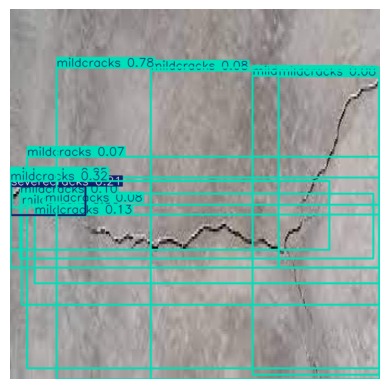

In [25]:
results = model.predict(
    source=r"C:\Users\prath\Downloads\runway crack detection.v3i.yolov8\train\images\download-7-_jpg.rf.0b77c26d5ca7c66379a88c27ca59f5ac.jpg",
    save=True,
    conf=0.05,      # lower confidence
    show_labels=True,
    show_conf=True
)

for r in results:
    im_array = r.plot()
    from matplotlib import pyplot as plt
    plt.imshow(im_array[..., ::-1])
    plt.axis("off")
    plt.show()


In [26]:
pip install streamlit ultralytics opencv-python-headless


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import streamlit as st
from ultralytics import YOLO
import cv2
from PIL import Image
import numpy as np

# Load your trained YOLO model
model = YOLO("runs/detect/runway_poc4/weights/best.pt")  # update path

st.title("Airport Runway Crack Detection 🚀")

# Upload image
uploaded_file = st.file_uploader("Upload an image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Read uploaded image
    image = Image.open(uploaded_file).convert("RGB")
    img_array = np.array(image)

    # Run YOLO prediction
    results = model.predict(source=img_array, conf=0.25, save=False)

    # Get annotated image
    annotated_img = results[0].plot()  # returns image with boxes

    # Convert to PIL and show in Streamlit
    annotated_pil = Image.fromarray(annotated_img)
    st.image(annotated_pil, caption="Detection Result", use_column_width=True)
